## Regression Models

In [0]:
simplified_dataset_url = "https://raw.githubusercontent.com/vishal-pandey/ml-and-ds/master/datasets/delhi_weather_simplified.csv"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
df1 = pd.read_csv(simplified_dataset_url)
df1['datetime_utc'] = pd.to_datetime(df1['datetime_utc'])
df1.set_index('datetime_utc', inplace= True)

### Data gereration


In [0]:
myTemperature = df1.iloc[:, -1].values
myData = df1.iloc[:, [0, 1, 2, 3, 4, 5, 6]]
myData1 = df1.iloc[:, [7]]

In [0]:
N = 25
O = 5
P = 25

In [0]:
X_multi = []
X_uni = []
y = []
for i in range(len(myData) - (N + O + P)):
  # temp = []
  # temp.append(pm25[i : i+N] + [0 for _ in range(O)] + pm25[i+N+O : i+N+O+P])
  temp1 = myData[i : i+N]
  temp2 = [[0 for __ in range(11)] for _ in range(O)]
  temp3 = myData[i+N+O : i+N+O+P]
  X_multi.append(np.append(np.append(temp1, temp2), temp3))

  temp1 = myData1[i : i+N]
  temp2 = [[0 for __ in range(11)] for _ in range(O)]
  temp3 = myData1[i+N+O : i+N+O+P]
  X_uni.append(np.append(np.append(temp1, temp2), temp3))
  
  y.append(myTemperature[i+N : i+N+O])


In [0]:
X_uni = np.array(X_uni)
X_multi = np.array(X_multi)
y = np.array(y)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train_uni, X_test_uni, y_train, y_test = train_test_split(X_uni, y, shuffle=False)
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, shuffle=False)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler_X_train_uni = StandardScaler()
scaler_X_train_uni.fit(X_train_uni)
X_train_uni = scaler_X_train_uni.transform(X_train_uni)

scaler_X_train_multi = StandardScaler()
scaler_X_train_multi.fit(X_train_multi)
X_train_multi = scaler_X_train_multi.transform(X_train_multi)

scaler_X_test_uni = StandardScaler()
scaler_X_test_uni.fit(X_test_uni)
X_test_uni = scaler_X_test_uni.transform(X_test_uni)

scaler_X_test_multi = StandardScaler()
scaler_X_test_multi.fit(X_test_multi)
X_test_multi = scaler_X_test_multi.transform(X_test_multi)

scaler_y_train = StandardScaler()
scaler_y_train.fit(y_train)
y_train = scaler_y_train.transform(y_train)

scaler_y_test = StandardScaler()
scaler_y_test.fit(y_test)
y_test = scaler_y_test.transform(y_test)

### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Univariate Linear Regression Forcasting

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_uni.reshape(X_train_uni.shape[0], -1), y_train.reshape(y_train.shape[0], -1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Training score
lin_reg.score(X_train_uni.reshape(X_train_uni.shape[0], -1), y_train.reshape(y_train.shape[0], -1))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8839824510703038

In [15]:
# Testing score
lin_reg.score(X_test_uni.reshape(X_test_uni.shape[0], -1), y_test.reshape(y_test.shape[0], -1))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8480579115966663

In [16]:
yhat = lin_reg.predict(X_test_uni.reshape(X_test_uni.shape[0], -1))
mean_squared_error(y_test ,yhat)

0.15194208840333387

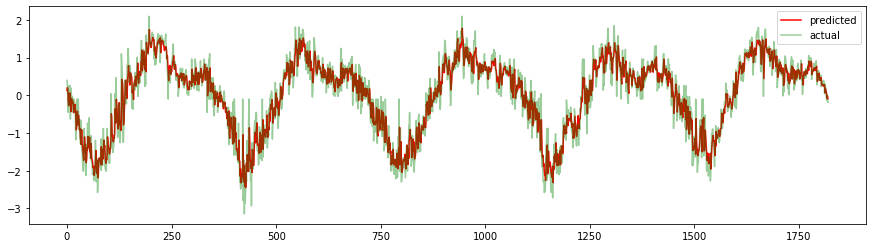

In [17]:
rl = 0
rr = 4000
plt.figure(figsize=(15, 4))
plt.plot(yhat[rl:rr, 0], 'r-', alpha=1, label='predicted')
plt.plot(y_test.reshape(y_test.shape[0], -1)[rl:rr, 0], 'g-', alpha=0.4, label='actual')
plt.legend()
plt.show()

#### Multi Variate Linear Regression Forcasting

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_multi.reshape(X_train_multi.shape[0], -1), y_train.reshape(y_train.shape[0], -1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Training score
lin_reg.score(X_train_multi.reshape(X_train_multi.shape[0], -1), y_train.reshape(y_train.shape[0], -1))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8468825502983534

In [20]:
# Testing score
lin_reg.score(X_test_multi.reshape(X_test_multi.shape[0], -1), y_test.reshape(y_test.shape[0], -1))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8017015080019501

In [22]:
yhat = lin_reg.predict(X_test_multi.reshape(X_test_multi.shape[0], -1))
mean_squared_error(y_test ,yhat)

0.19829849199805

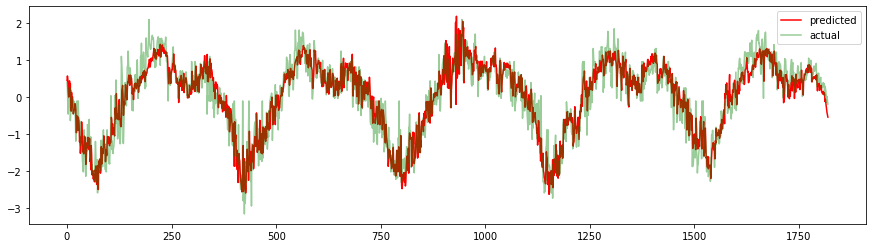

In [23]:
rl = 0
rr = 4000
plt.figure(figsize=(15, 4))
plt.plot(yhat[rl:rr, 0], 'r-', alpha=1, label='predicted')
plt.plot(y_test.reshape(y_test.shape[0], -1)[rl:rr, 0], 'g-', alpha=0.4, label='actual')
plt.legend()
plt.show()

### Lasso Regression

In [0]:
from sklearn.linear_model import Lasso

#### Univariate Lasso Regression Forcasting

In [25]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_uni.reshape(X_train_uni.shape[0], -1), y_train.reshape(y_train.shape[0], -1))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
# Training score
lasso_reg.score(X_train_uni.reshape(X_train_uni.shape[0], -1), y_train.reshape(y_train.shape[0], -1))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8712021985755312

In [27]:
# Testing score
lasso_reg.score(X_test_uni.reshape(X_test_uni.shape[0], -1), y_test.reshape(y_test.shape[0], -1))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8364111565689837

In [28]:
yhat = lasso_reg.predict(X_test_uni.reshape(X_test_uni.shape[0], -1))
mean_squared_error(y_test ,yhat)

0.1635888434310165

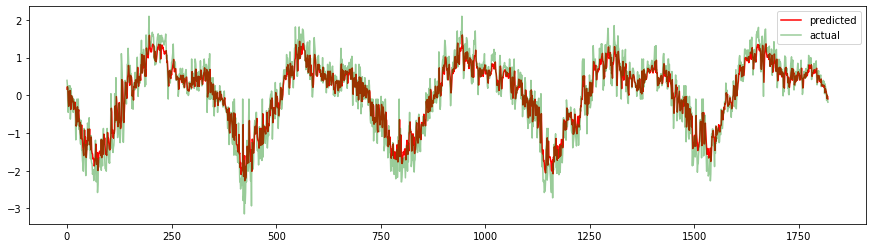

In [29]:
rl = 0
rr = 4000
plt.figure(figsize=(15, 4))
plt.plot(yhat[rl:rr, 0], 'r-', alpha=1, label='predicted')
plt.plot(y_test.reshape(y_test.shape[0], -1)[rl:rr, 0], 'g-', alpha=0.4, label='actual')
plt.legend()
plt.show()

#### Multi Variate Lasso Regression Forcasting

In [30]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_multi.reshape(X_train_multi.shape[0], -1), y_train.reshape(y_train.shape[0], -1))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
# Training score
lasso_reg.score(X_train_multi.reshape(X_train_multi.shape[0], -1), y_train.reshape(y_train.shape[0], -1))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.7857222772220016

In [32]:
# Testing score
lasso_reg.score(X_test_multi.reshape(X_test_multi.shape[0], -1), y_test.reshape(y_test.shape[0], -1))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.7784125698143842

In [33]:
yhat = lasso_reg.predict(X_test_multi.reshape(X_test_multi.shape[0], -1))
mean_squared_error(y_test ,yhat)

0.22158743018561586

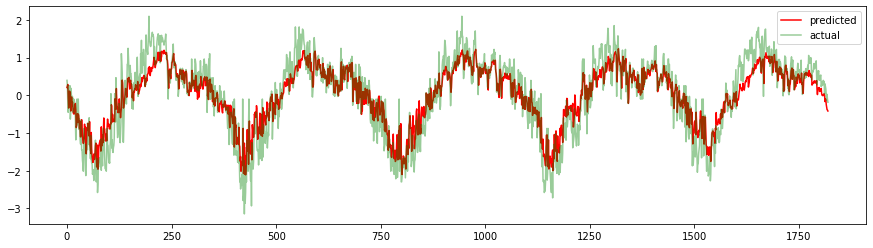

In [34]:
rl = 0
rr = 4000
plt.figure(figsize=(15, 4))
plt.plot(yhat[rl:rr, 0], 'r-', alpha=1, label='predicted')
plt.plot(y_test.reshape(y_test.shape[0], -1)[rl:rr, 0], 'g-', alpha=0.4, label='actual')
plt.legend()
plt.show()